In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir('./drive/MyDrive/266_project/project/')

Mounted at /content/drive/


In [ ]:
# os.chdir('../')
!ls

sample_data


In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.8 MB/s eta 0:00:00


In [ ]:
"""
Predictions
with Optuna best hyperparameters and loaded embeddings from w2v and BERT
"""

# Import packages
# Admin
import os
import time
import re
import optuna

# Data
import pandas as pd
import numpy as np
import random

# Gradients
import csv
import pickle

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, precision_recall_curve, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve

# Custom modules
from global_vars import GVD, FPATH
from project_utils import calculate_metrics


#pca
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

#plotting for embedding analysis
import plotly.graph_objs as go

In [ ]:
project_dict = [
  {'NAME':'BERT', 'W2V': False, 'FINETUNING':False, 'BASELINE': True, 'CONFIG':'bert-base-uncased'},
  {'NAME':'CNNForWord2VecBERT', 'W2V': True, 'FINETUNING':False, 'BASELINE': False, 'CONFIG':'bert-base-uncased'},
  {'NAME':'CNNForWord2VecBERTFT', 'W2V': True, 'FINETUNING':True, 'BASELINE': False, 'CONFIG':'bert-base-uncased'},
  {'NAME':'BERTweet', 'W2V': False, 'FINETUNING':False, 'BASELINE': True, 'CONFIG':'vinai/bertweet-base'},
  {'NAME':'CNNForWord2VecBERTweet', 'W2V': True, 'FINETUNING':False, 'BASELINE': False, 'CONFIG':'vinai/bertweet-base'},
  {'NAME':'CNNForWord2VecBERTweetFT', 'W2V': True, 'FINETUNING':True, 'BASELINE': False, 'CONFIG':'vinai/bertweet-base'},
  {'NAME':'ALBERT', 'W2V': False, 'FINETUNING':False, 'BASELINE': True, 'CONFIG':'albert/albert-base-v2'},
  {'NAME':'CNNForWord2VecALBERT', 'W2V': True, 'FINETUNING':False, 'BASELINE': False, 'CONFIG':'albert/albert-base-v2'},
  {'NAME':'CNNForWord2VecALBERTFT', 'W2V': True, 'FINETUNING':True, 'BASELINE': False, 'CONFIG':'albert/albert-base-v2'}
]

# Instantiate dataframe for each model performance result
df_BERT = pd.read_pickle(FPATH + project_dict[0]['NAME']+'_test_df.pkl')
df_CNNForWord2VecBERT = pd.read_pickle(FPATH + project_dict[1]['NAME']+'_test_df.pkl')
df_CNNForWord2VecBERTFT = pd.read_pickle(FPATH + project_dict[2]['NAME']+'_test_df.pkl')
df_BERTweet= pd.read_pickle(FPATH + project_dict[3]['NAME']+'_test_df.pkl')
df_CNNForWord2VecBERTweet = pd.read_pickle(FPATH + project_dict[4]['NAME']+'_test_df.pkl')
df_CNNForWord2VecBERTweetFT = pd.read_pickle(FPATH + project_dict[5]['NAME']+'_test_df.pkl')
df_ALBERT = pd.read_pickle(FPATH + project_dict[6]['NAME']+'_test_df.pkl')
df_CNNForWord2VecALBERT = pd.read_pickle(FPATH + project_dict[7]['NAME']+'_test_df.pkl')
df_CNNForWord2VecALBERTFT = pd.read_pickle(FPATH + project_dict[8]['NAME']+'_test_df.pkl')

In [ ]:
df_CNNForWord2VecALBERT['category'].unique()

array(['FP', 'TP'], dtype=object)

In [ ]:
df_CNNForBERTweet['category'].unique()

array(['TN', 'FN'], dtype=object)

In [ ]:
with open(FPATH + 'optuna_study_BERTweet.pkl', 'rb') as f:
  berttweet_study = pickle.load(f)
d = berttweet_study.trials_dataframe()
d.sort_values('value',ascending=False,inplace=True)
d.head(1).T

,0
number,0
value,0.8696
datetime_start,2024-04-10 03:26:32.409453
datetime_complete,2024-04-10 03:30:58.848973
duration,0 days 00:04:26.439520
params_accumulation_steps,4
params_batch_size,3
params_dropout_rate,0.137484
params_epochs,4
params_learning_rate,0.00001


In [ ]:
d.number.nunique()

5

# Model Performance Metrics
## Bert

=============CNNForBERT==============
accuracy: 0.8523333333333334 precision 0.853985264567984 recall: 0.85 f1: 0.8519879719345139


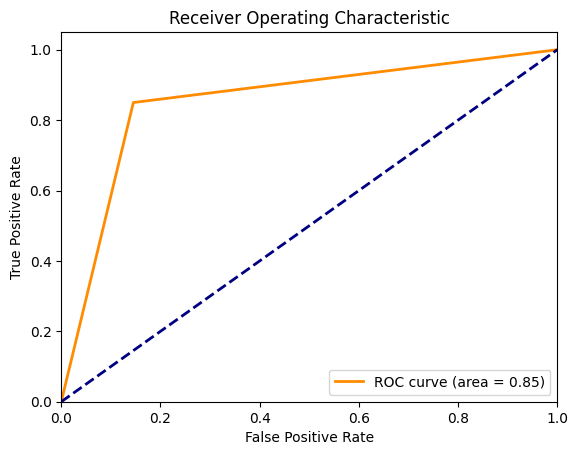

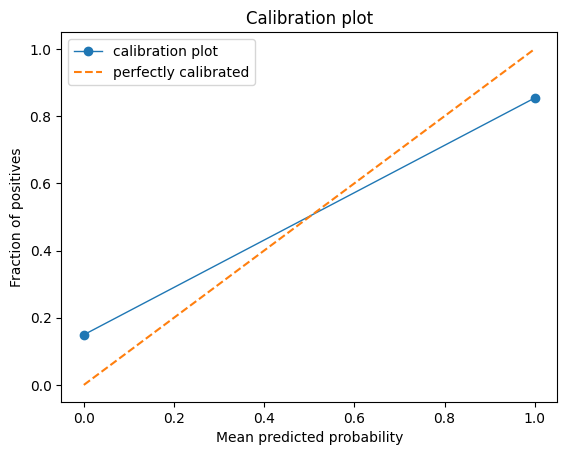

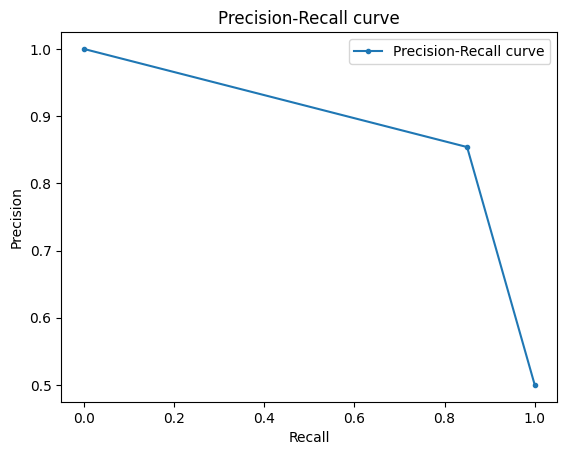

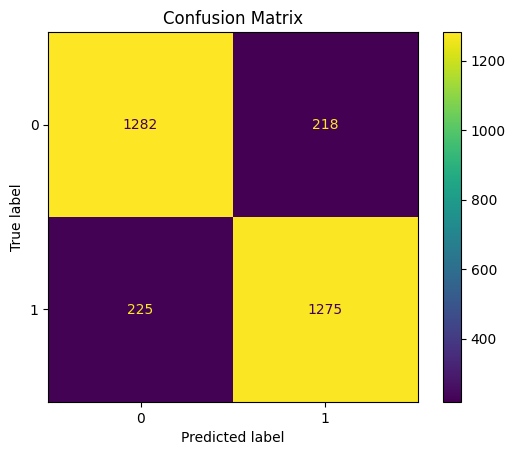

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1500
         1.0       0.85      0.85      0.85      1500

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



In [ ]:
calculate_metrics(
    predictions = df_CNNForBERT['pred'].to_list(),
    true_labels = df_CNNForBERT['label'].to_list(),
    name='BERT')

## CNNForWord2VecBERT

=============CNNForWord2VecBERT==============
accuracy: 0.8956666666666667 precision 0.9272858171346292 recall: 0.8586666666666667 f1: 0.8916580131533403


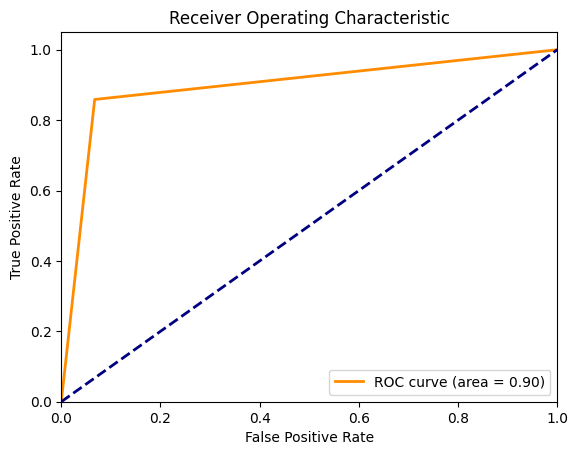

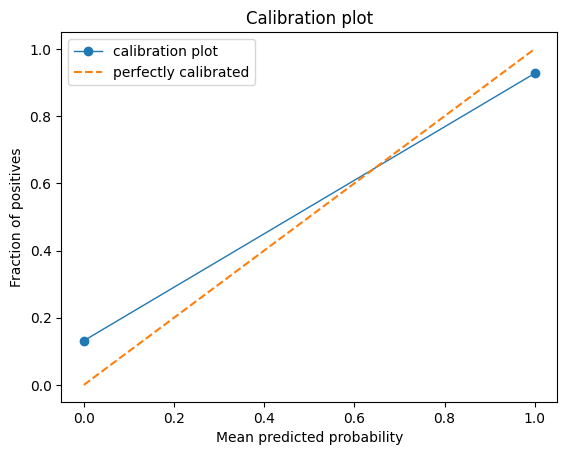

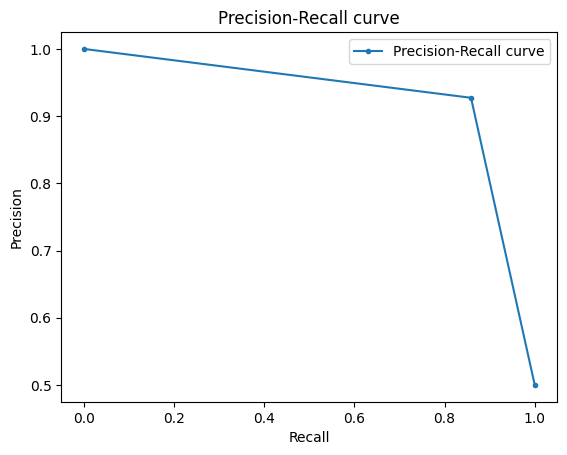

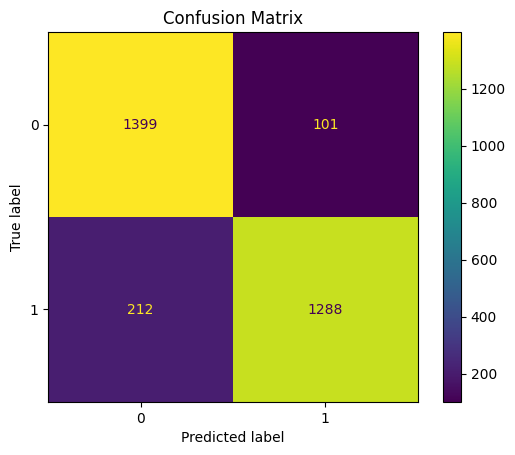

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      1500
         1.0       0.93      0.86      0.89      1500

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



In [ ]:
calculate_metrics(
    predictions = df_CNNForWord2VecBERT['pred'].to_list(),
    true_labels = df_CNNForWord2VecBERT['label'].to_list(),
    name='CNNForWord2VecBERT')

## CNNForWord2VecBERTFT

=============CNNForWord2VecBERTFT==============
accuracy: 0.7913333333333333 precision 0.79890560875513 recall: 0.7786666666666666 f1: 0.7886563133018231


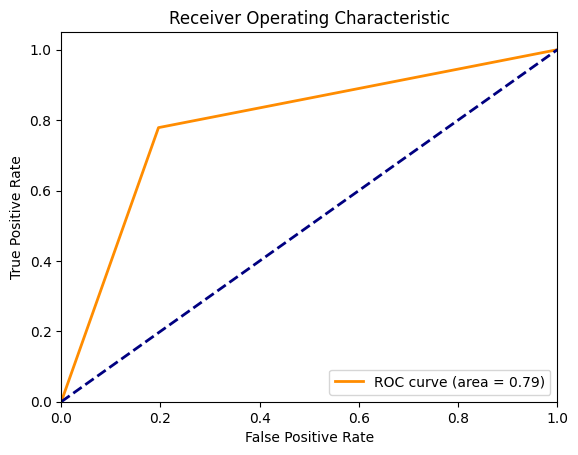

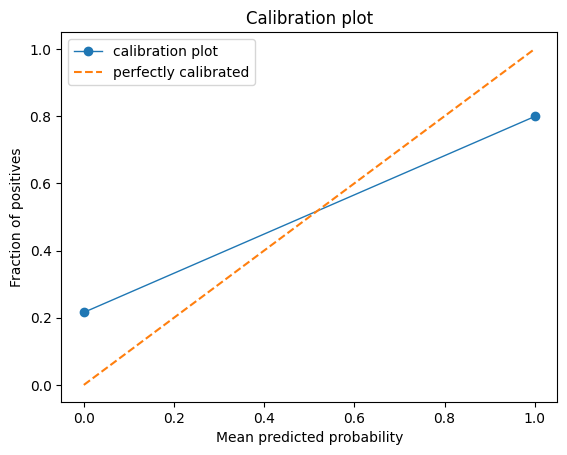

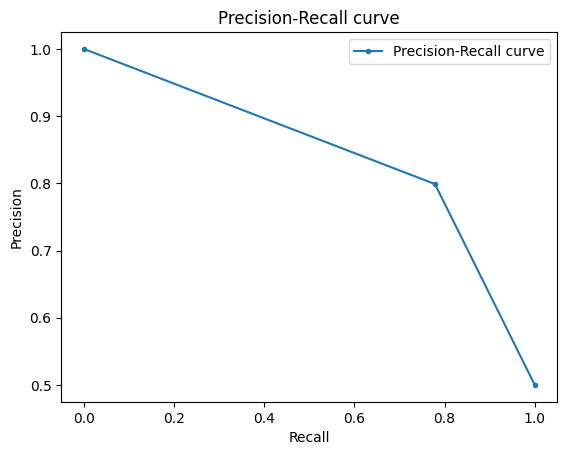

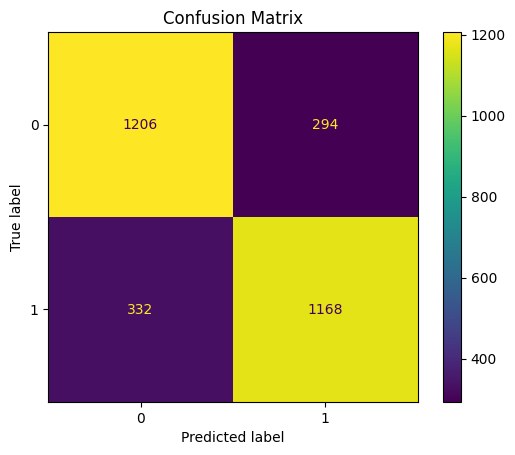

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      1500
         1.0       0.80      0.78      0.79      1500

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000



In [ ]:
calculate_metrics(
    predictions = df_CNNForWord2VecBERTFT['pred'].to_list(),
    true_labels = df_CNNForWord2VecBERTFT['label'].to_list(),
    name='CNNForWord2VecBERTFT')

## BERTweet

=============CNNForBERTweet==============
accuracy: 0.8976666666666666 precision 0.8989966555183947 recall: 0.896 f1: 0.8974958263772956


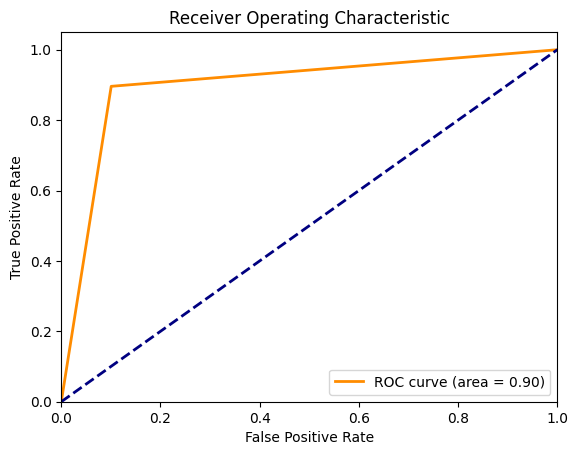

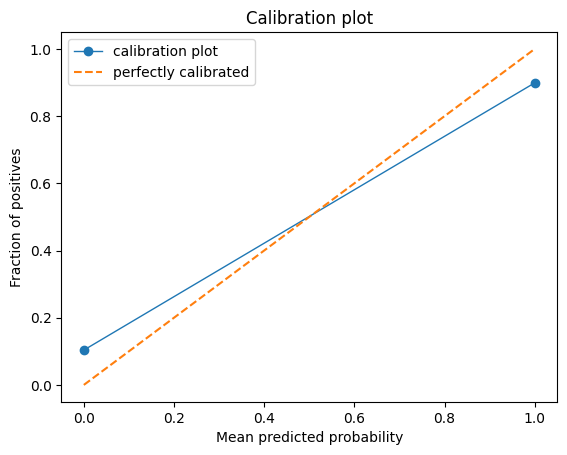

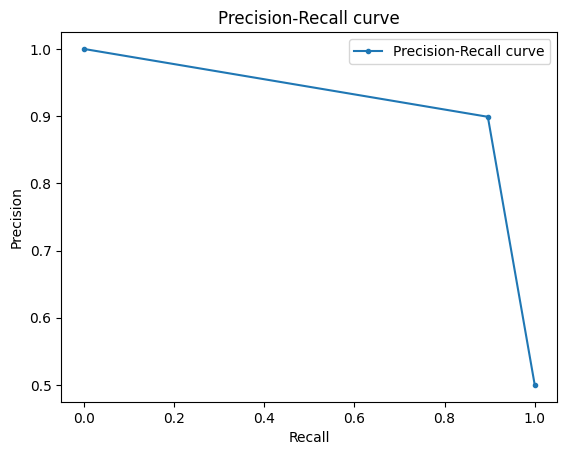

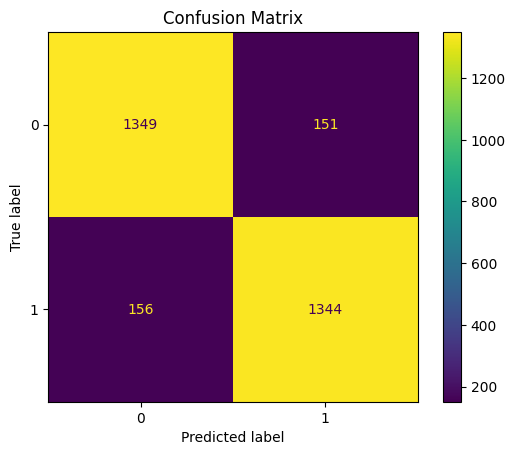

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      1500
         1.0       0.90      0.90      0.90      1500

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



In [ ]:
calculate_metrics(
    predictions = df_CNNForBERTweet['pred'].to_list(),
    true_labels = df_CNNForBERTweet['label'].to_list(),
    name='BERTweet')

## CNNForWord2VecBERTweet

=============CNNForWord2VecBERTweet==============
accuracy: 0.8903333333333333 precision 0.9507313317936874 recall: 0.8233333333333334 f1: 0.8824580207216863


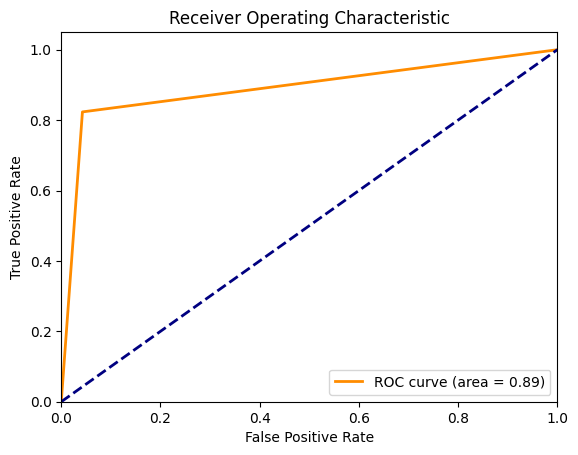

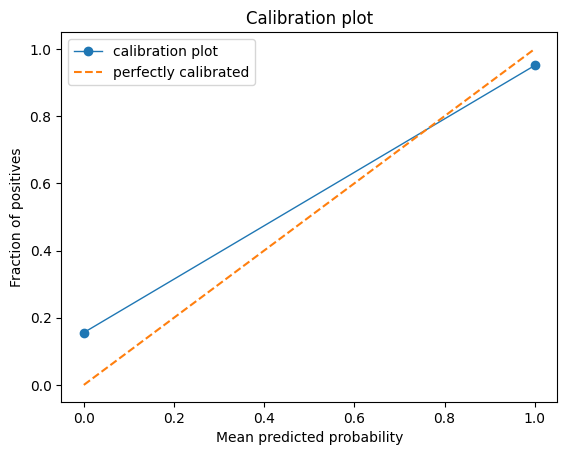

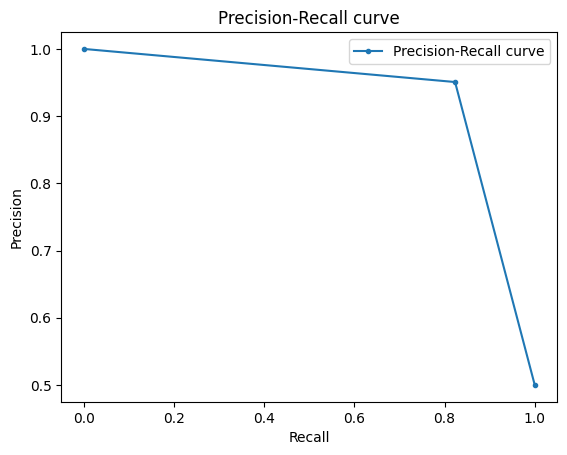

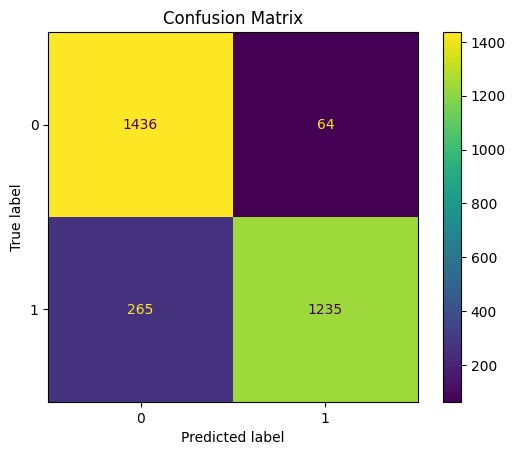

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      1500
         1.0       0.95      0.82      0.88      1500

    accuracy                           0.89      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.90      0.89      0.89      3000



In [ ]:
calculate_metrics(
    predictions = df_CNNForWord2VecBERTweet['pred'].to_list(),
    true_labels = df_CNNForWord2VecBERTweet['label'].to_list(),
    name='CNNForWord2VecBERTweet')

## CNNForWord2VecBERTweetFT

=============CNNForWord2VecBERTweetFT==============
accuracy: 0.877 precision 0.8688845401174168 recall: 0.888 f1: 0.8783382789317508


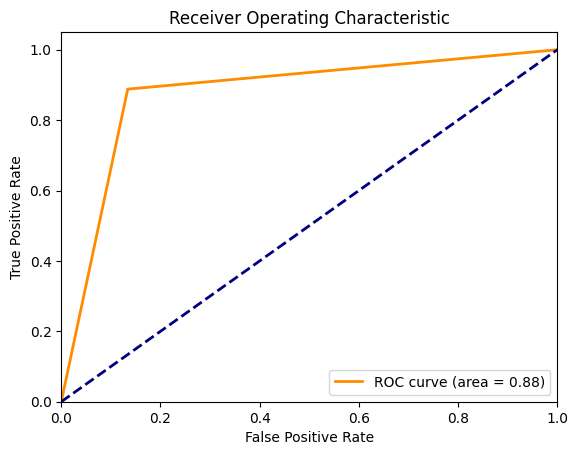

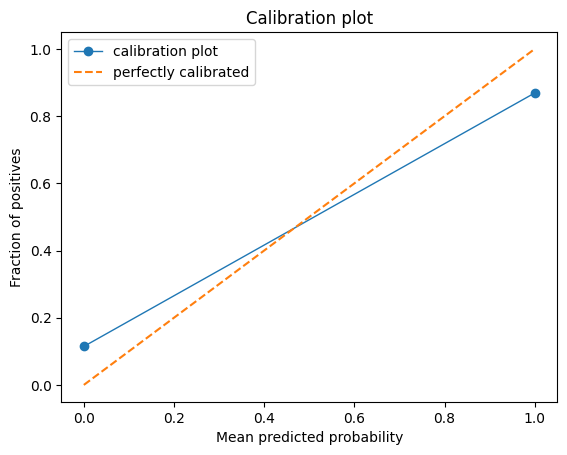

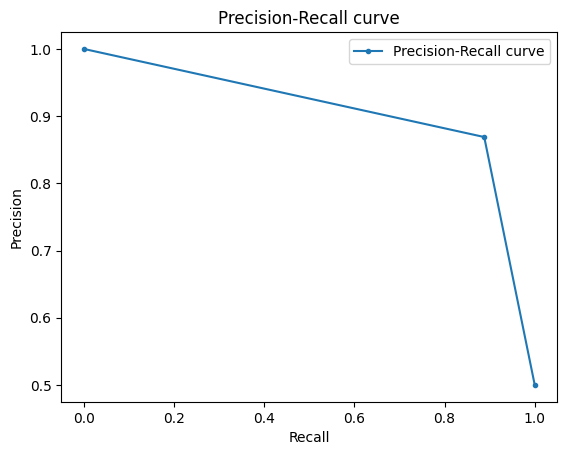

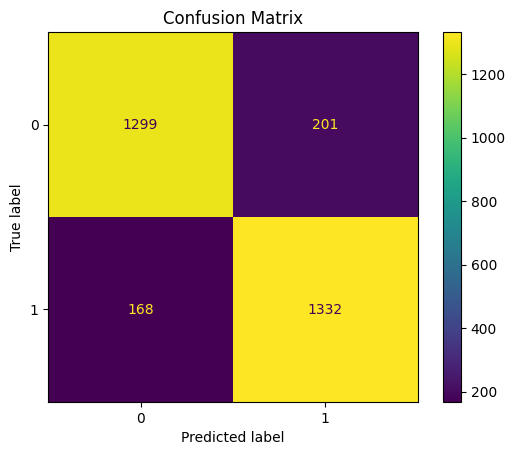

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1500
         1.0       0.87      0.89      0.88      1500

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



In [ ]:
calculate_metrics(
    predictions = df_CNNForALBERT['pred'].to_list(),
    true_labels = df_CNNForALBERT['label'].to_list(),
    name='CNNForWord2VecBERTweetFT')

## ALBERT

=============CNNForALBERT==============
accuracy: 0.877 precision 0.8688845401174168 recall: 0.888 f1: 0.8783382789317508


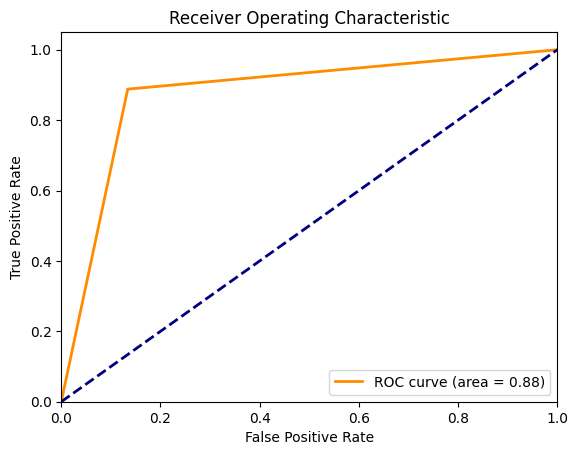

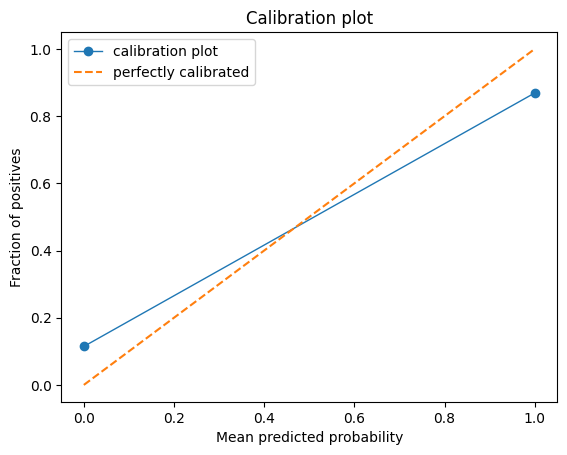

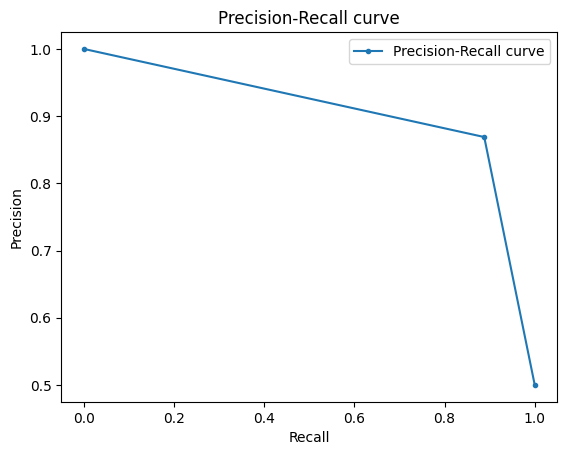

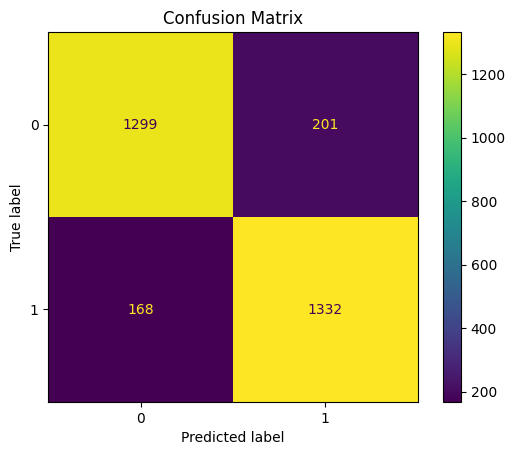

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1500
         1.0       0.87      0.89      0.88      1500

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



In [ ]:
calculate_metrics(
    predictions = df_CNNForALBERT['pred'].to_list(),
    true_labels = df_CNNForALBERT['label'].to_list(),
    name='ALBERT')

## CNNForWord2VecALBERT

=============CNNForWord2VecALBERT==============
accuracy: 0.87 precision 0.8272405660377359 recall: 0.9353333333333333 f1: 0.8779724655819774


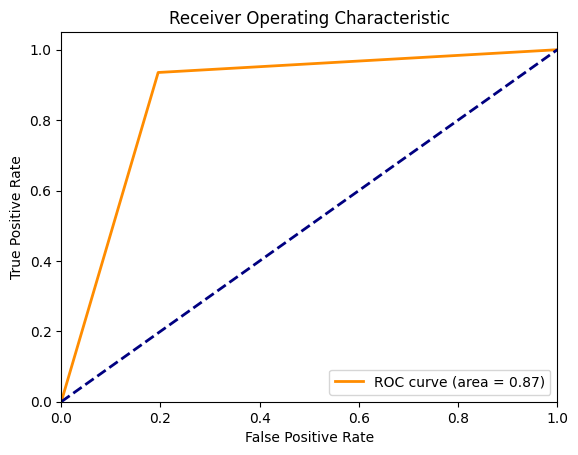

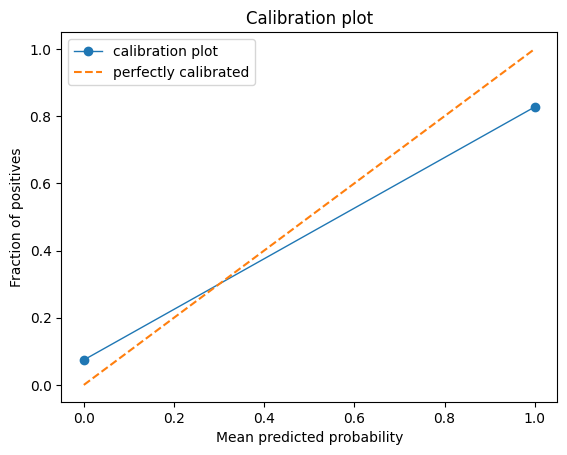

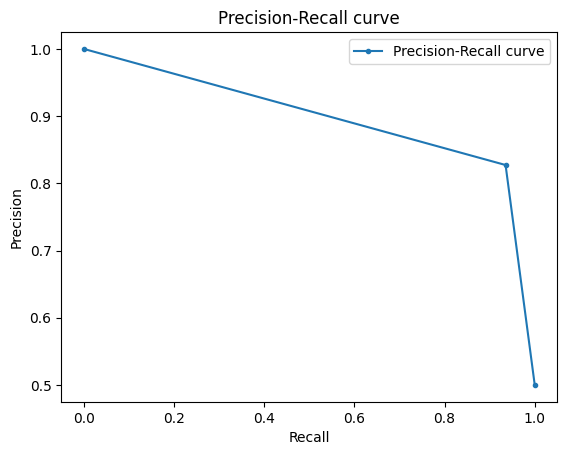

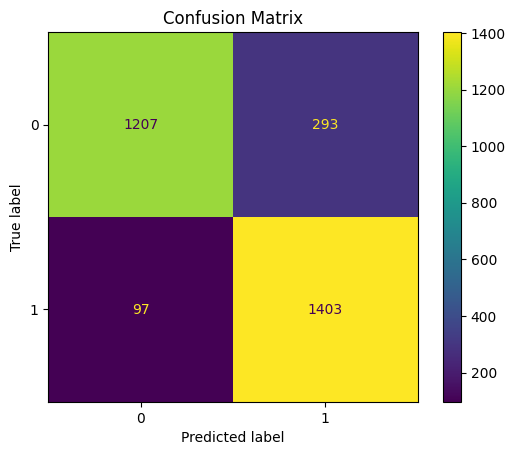

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      1500
         1.0       0.83      0.94      0.88      1500

    accuracy                           0.87      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.88      0.87      0.87      3000



In [ ]:
calculate_metrics(
    predictions = df_CNNForWord2VecALBERT['pred'].to_list(),
    true_labels = df_CNNForWord2VecALBERT['label'].to_list(),
    name='CNNForWord2VecALBERT')

## CNNForWord2VecALBERTFT

=============CNNForWord2VecALBERTFT==============
accuracy: 0.7566666666666667 precision 0.8296232876712328 recall: 0.646 f1: 0.7263868065967017


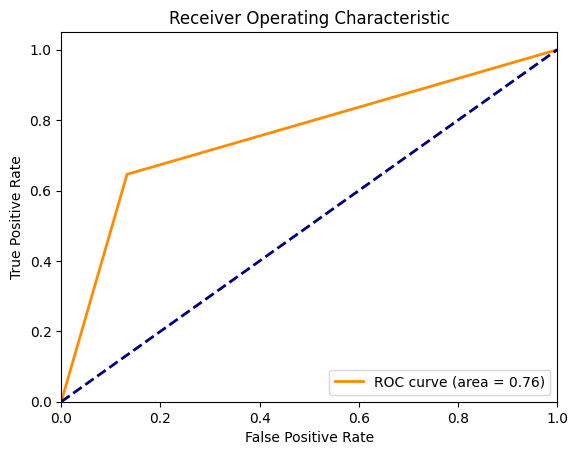

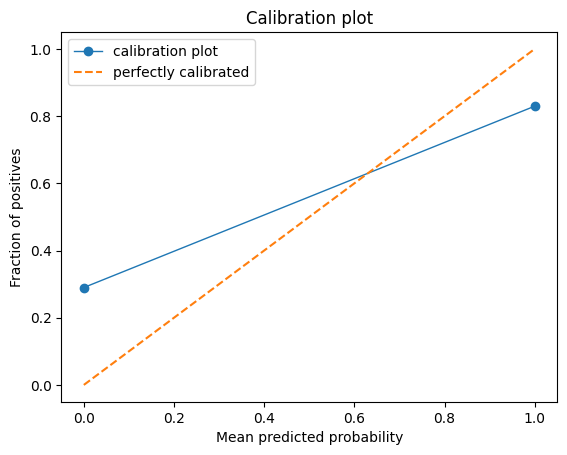

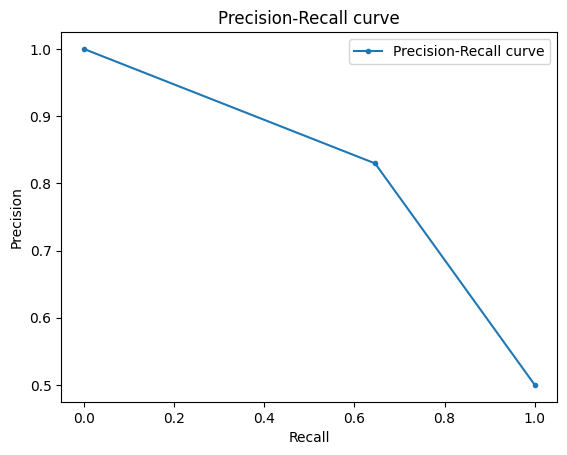

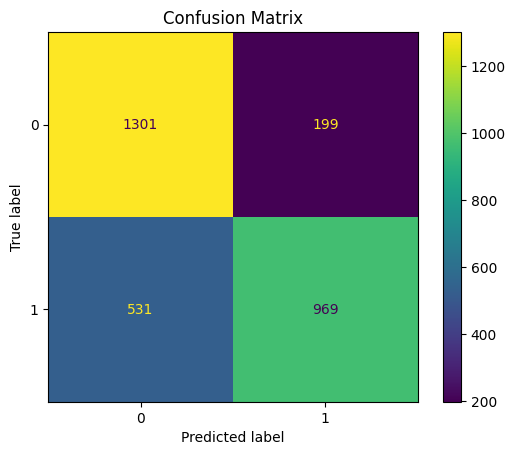

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78      1500
         1.0       0.83      0.65      0.73      1500

    accuracy                           0.76      3000
   macro avg       0.77      0.76      0.75      3000
weighted avg       0.77      0.76      0.75      3000



In [ ]:
calculate_metrics(
    predictions = df_CNNForWord2VecALBERTFT['pred'].to_list(),
    true_labels = df_CNNForWord2VecALBERTFT['label'].to_list(),
    name='CNNForWord2VecALBERTFT')

# Fin